In [1]:
import pandas as pd
import  matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
df_customers=pd.read_csv('customers.csv')
df_loans=pd.read_csv('loans.csv')
df_bureau=pd.read_csv('bureau_data.csv')

In [3]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [4]:
df_customers.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [5]:
df_loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [6]:
df_bureau.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


In [7]:
df=pd.merge(df_customers,df_loans,on='cust_id')
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [8]:
df=pd.merge(df,df_bureau,on='cust_id')
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [10]:
df['default']=df['default'].astype(int)
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

<h3 align='center' style='color:blue'>Train-Test Split</h3>

In [11]:
X=df.drop('default',axis='columns')
y=df['default']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
df_train=pd.concat([X_train,y_train],axis='columns')
df_test=pd.concat([X_test,y_test],axis='columns')

In [13]:
df_train.shape, df_test.shape

((37500, 33), (12500, 33))

<h3 align='center' style='color:blue'>Data Cleaning</h3>

In [14]:
df_train.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [15]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [16]:
md=df_train.residence_type.mode()[0]
md

'Owned'

In [17]:
df_train.residence_type.fillna(md,inplace=True)

C:\Users\Priyanka Kansal\AppData\Local\Temp\ipykernel_25080\2194692674.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(md,inplace=True)


In [18]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [19]:
df_train.duplicated().sum()

np.int64(0)

In [20]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [21]:
df_test.residence_type.fillna(df_test.residence_type.mode()[0],inplace=True)

C:\Users\Priyanka Kansal\AppData\Local\Temp\ipykernel_25080\2285246874.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.residence_type.fillna(df_test.residence_type.mode()[0],inplace=True)


In [22]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37500 entries, 27434 to 15795
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      37500 non-null  object 
 1   age                          37500 non-null  int64  
 2   gender                       37500 non-null  object 
 3   marital_status               37500 non-null  object 
 4   employment_status            37500 non-null  object 
 5   income                       37500 non-null  int64  
 6   number_of_dependants         37500 non-null  int64  
 7   residence_type               37500 non-null  object 
 8   years_at_current_address     37500 non-null  int64  
 9   city                         37500 non-null  object 
 10  state                        37500 non-null  object 
 11  zipcode                      37500 non-null  int64  
 12  loan_id                      37500 non-null  object 
 13  loan_purpose     

In [24]:
columns_numerical=['age','income', 'number_of_dependants',
       'years_at_current_address', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application','number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical=['gender', 'marital_status', 'employment_status','residence_type',
       'city', 'state', 'zipcode',
       'loan_purpose', 'loan_type', 'default']

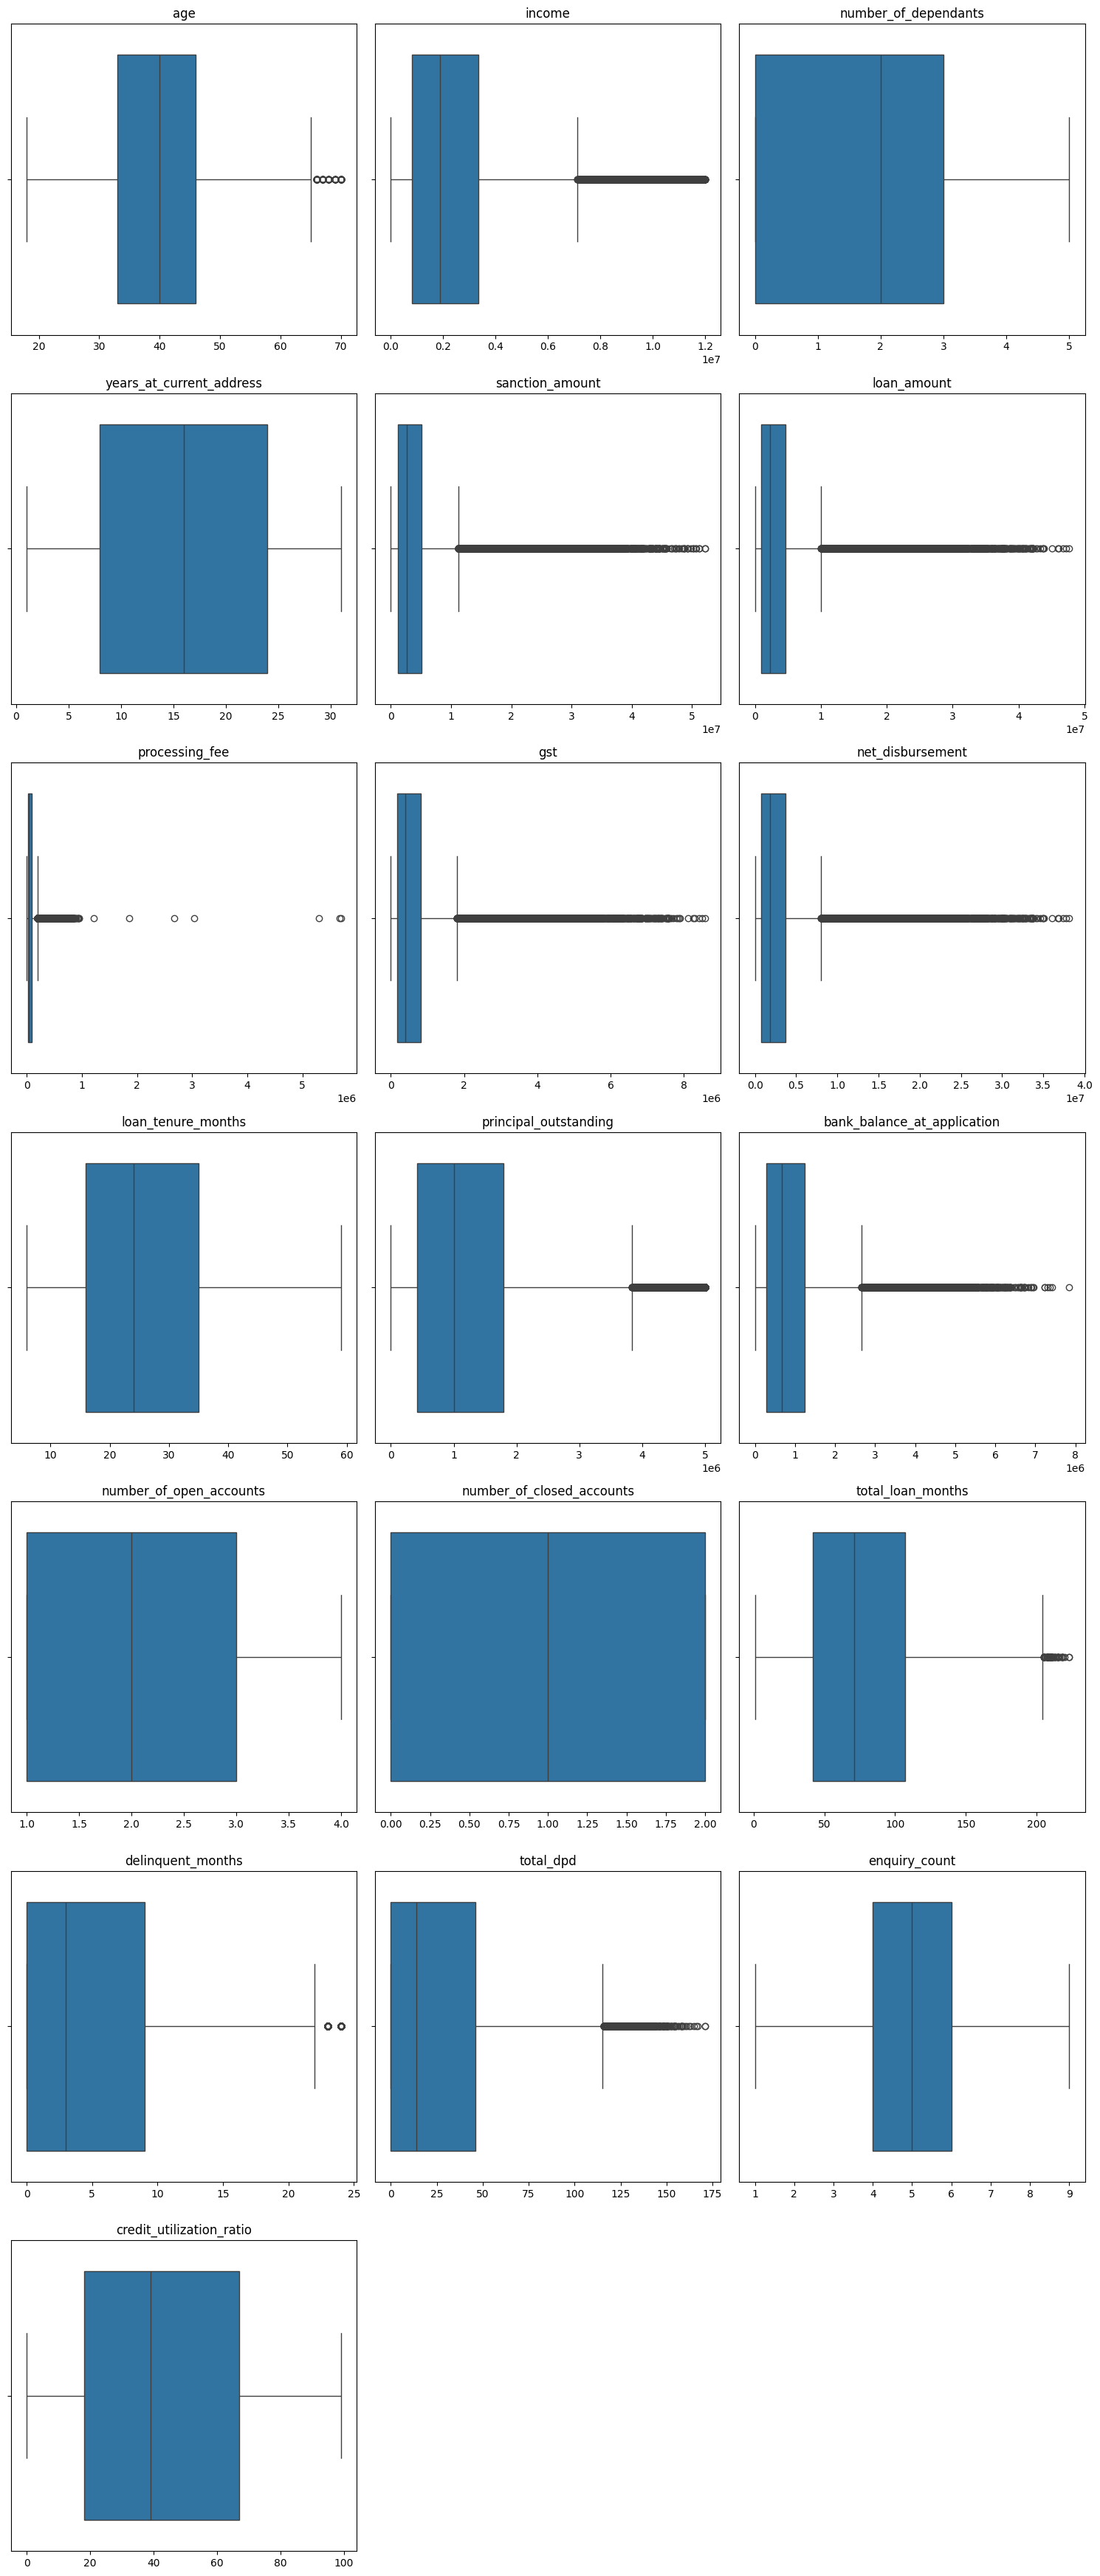

In [25]:
import math
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(columns_numerical) / n_cols)

# Create subplots
plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(columns_numerical, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df_train[col])
    plt.title(f"{col}", fontsize=12)
    plt.xlabel("")
    plt.tight_layout()

plt.show()

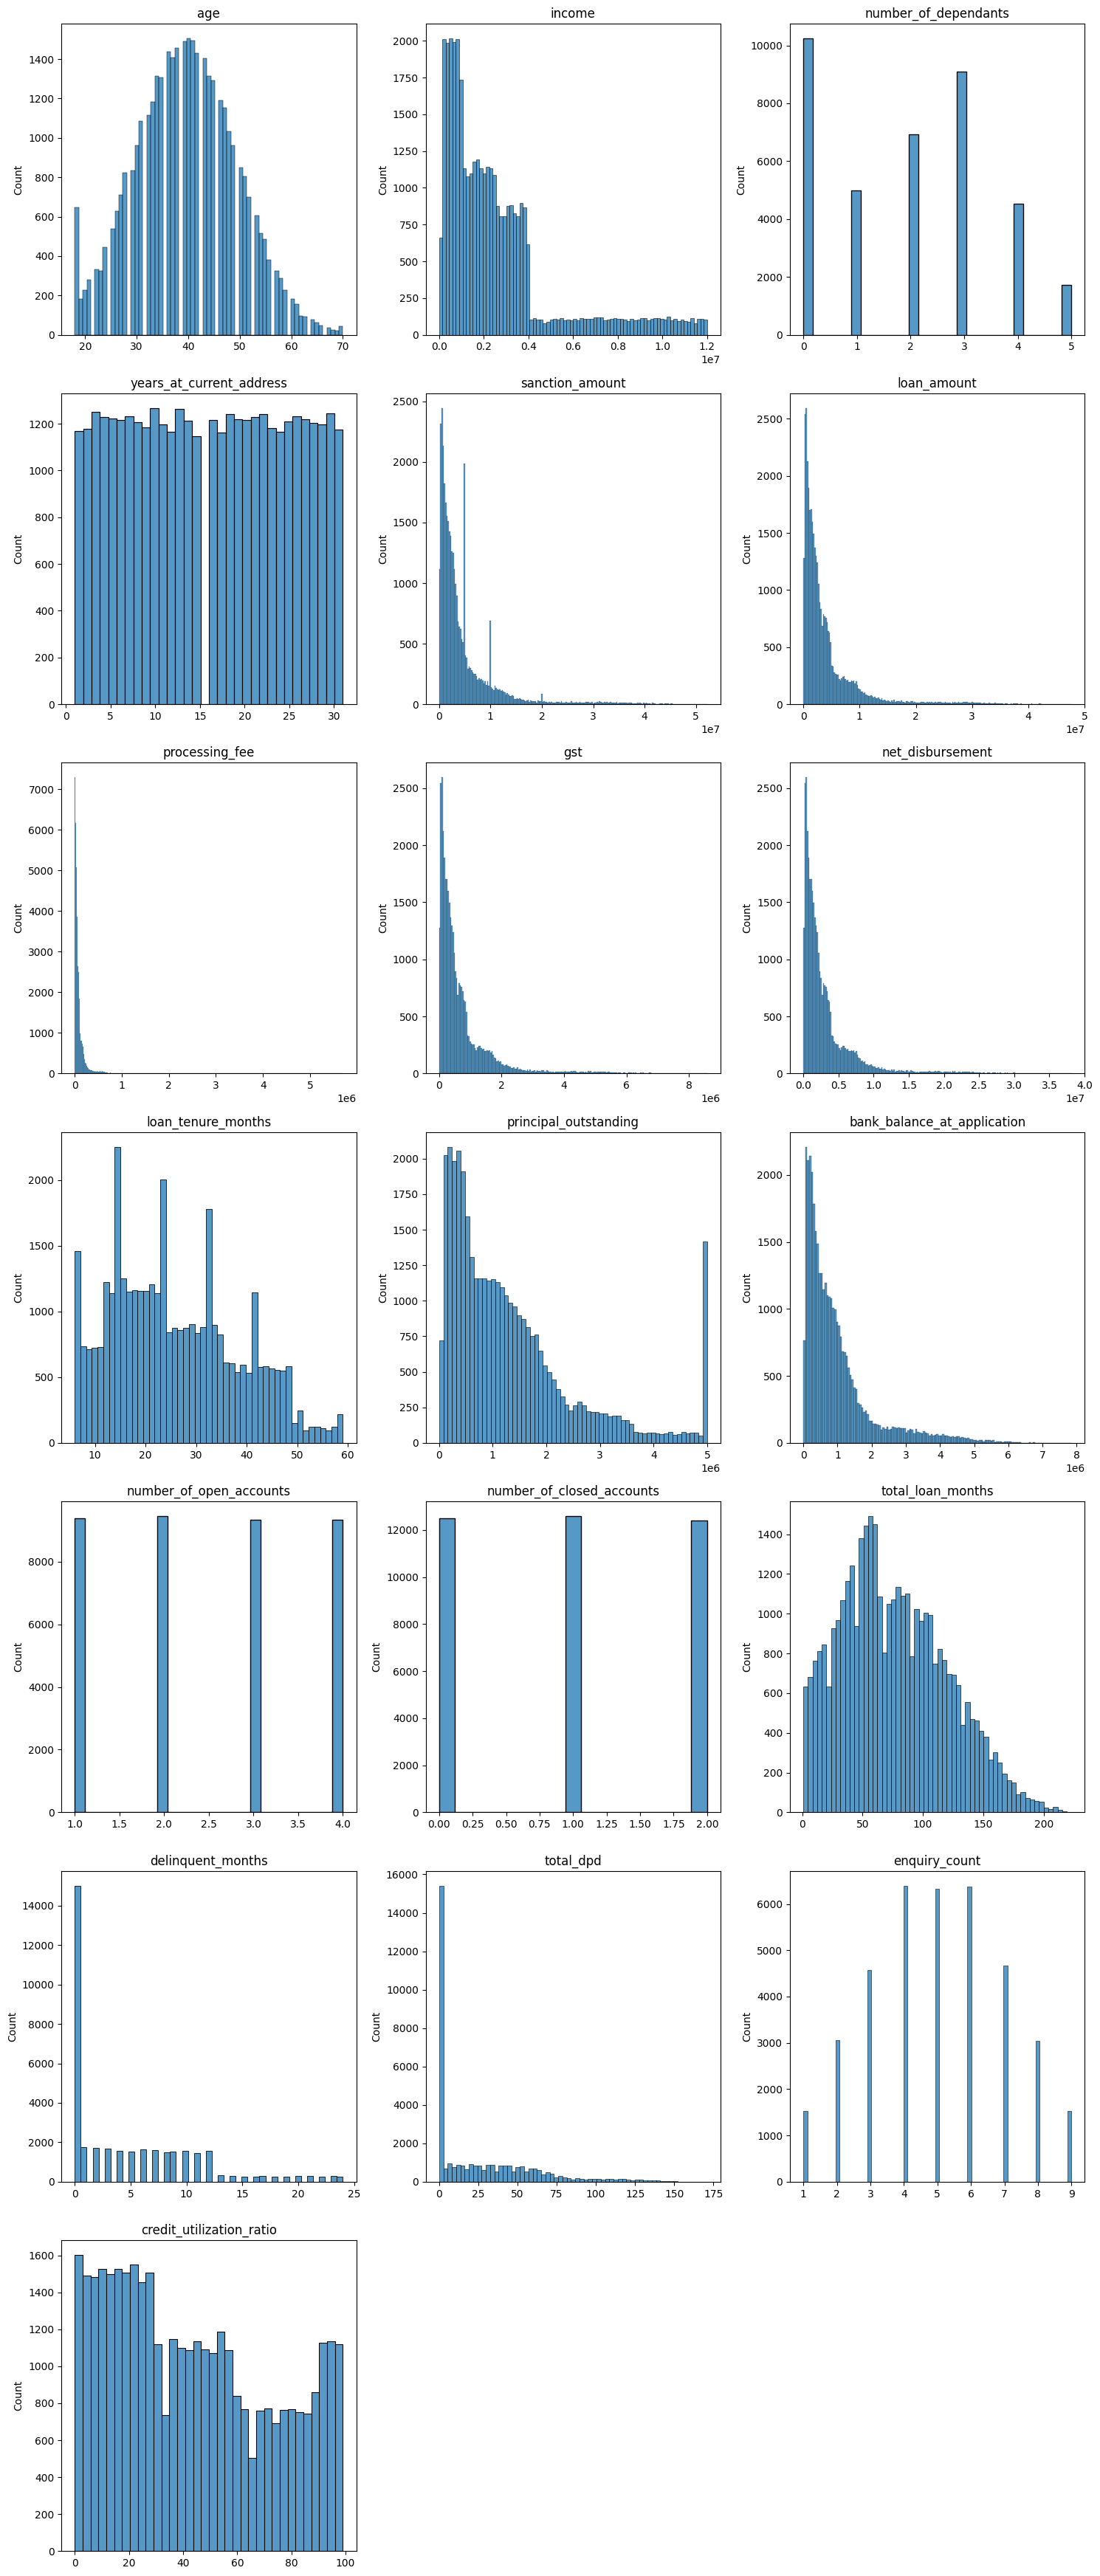

In [26]:

n_cols = 3  # number of plots per row
n_rows = math.ceil(len(columns_numerical) / n_cols)

# Create subplots
plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(columns_numerical, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(x=df_train[col])
    plt.title(f"{col}", fontsize=12)
    plt.xlabel("")
    plt.tight_layout()

plt.show()

In [27]:
df_train.processing_fee.describe()

count     37500.00
mean      80724.11
std      120830.65
min           0.00
25%       19180.00
50%       44700.00
75%       92000.00
max     5698029.90
Name: processing_fee, dtype: float64

In [28]:
df_train[df_train.processing_fee>df_train.loan_amount][['loan_amount','processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.02
9898,3626000,5293543.52
47089,1738000,1858964.77
33705,3812000,5678020.86
12294,4639000,5698029.90
28174,966000,1214492.67
29305,2616000,3036378.01


In [29]:
df_train[(df_train.processing_fee/df_train.loan_amount)>0.03][['loan_amount','processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.02
9898,3626000,5293543.52
47089,1738000,1858964.77
33705,3812000,5678020.86
12294,4639000,5698029.90
28174,966000,1214492.67
29305,2616000,3036378.01


In [30]:
# can be replaced by fixed processing fee or we can ignore as there are only 5 records
df_train_1=df_train[(df_train.processing_fee/df_train.loan_amount)<0.03].copy()  #shallow copy so that it doesnt change anything in original dataset (for reproducibility) 

In [31]:
df_train_1[(df_train_1.processing_fee/df_train_1.loan_amount)>0.03][['loan_amount','processing_fee']]

,loan_amount,processing_fee


In [32]:
#doin gon test set as well
df_test_1=df_test[(df_test.processing_fee/df_test.loan_amount)<0.03].copy()

In [33]:
for col in columns_categorical:
    print(col,'-->',df_train[col].unique())

gender --> ['F' 'M']
marital_status --> ['Single' 'Married']
employment_status --> ['Salaried' 'Self-Employed']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state --> ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
zipcode --> [380001 110001 226001 560001 302001 500001 700001 411001 600001 400001]
loan_purpose --> ['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


In [34]:
df_train_1['loan_purpose'].replace('Personaal','Personal',inplace=True)

C:\Users\Priyanka Kansal\AppData\Local\Temp\ipykernel_25080\2387448056.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_1['loan_purpose'].replace('Personaal','Personal',inplace=True)


In [35]:
df_train_1['loan_purpose'].unique()

array(['Home', 'Auto', 'Personal', 'Education'], dtype=object)

In [36]:
df_test_1['loan_purpose'].replace('Personaal','Personal',inplace=True)

C:\Users\Priyanka Kansal\AppData\Local\Temp\ipykernel_25080\3743007210.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test_1['loan_purpose'].replace('Personaal','Personal',inplace=True)


In [37]:
df_test_1['loan_purpose'].unique()

array(['Education', 'Home', 'Auto', 'Personal'], dtype=object)

In [38]:
df_train_1[(df_train_1.gst/df_train_1.loan_amount)>0.2]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


In [39]:
df_train_1[(df_train_1.sanction_amount<df_train_1.loan_amount)]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


<h3 align='center' style='color:blue'>Exploratory Data Analysis</h3>

In [40]:
columns_numerical

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

<Axes: xlabel='age', ylabel='Count'>

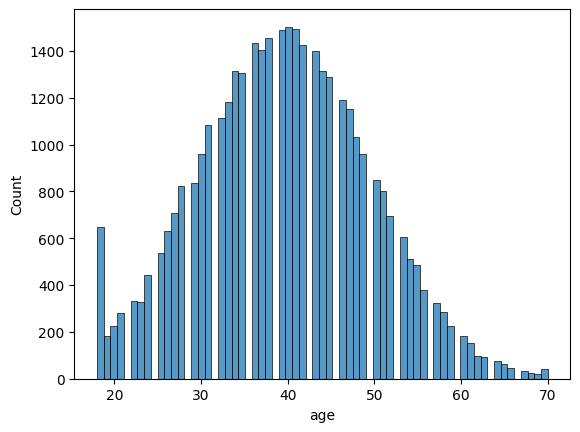

In [41]:
sns.histplot(df_train_1.age,fill=True)

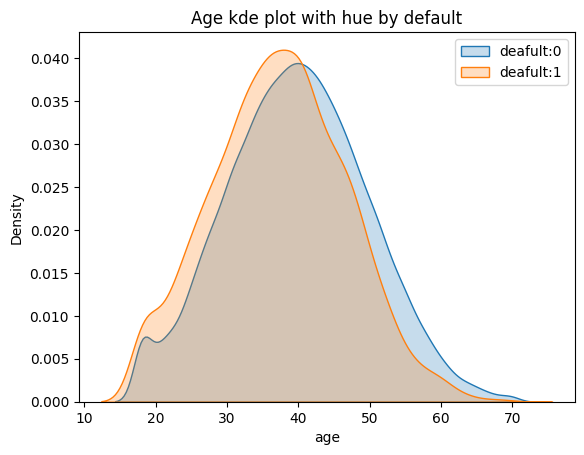

In [42]:
sns.kdeplot(df_train_1[df_train_1.default==0]['age'],fill=True,label='deafult:0')
sns.kdeplot(df_train_1[df_train_1.default==1]['age'],fill=True,label='deafult:1')
plt.title('Age kde plot with hue by default')
plt.legend()
plt.show()

Insights:
1. Orange graph shifted to left of blue graph which indicates that depicts people with younger age are likely to get default 

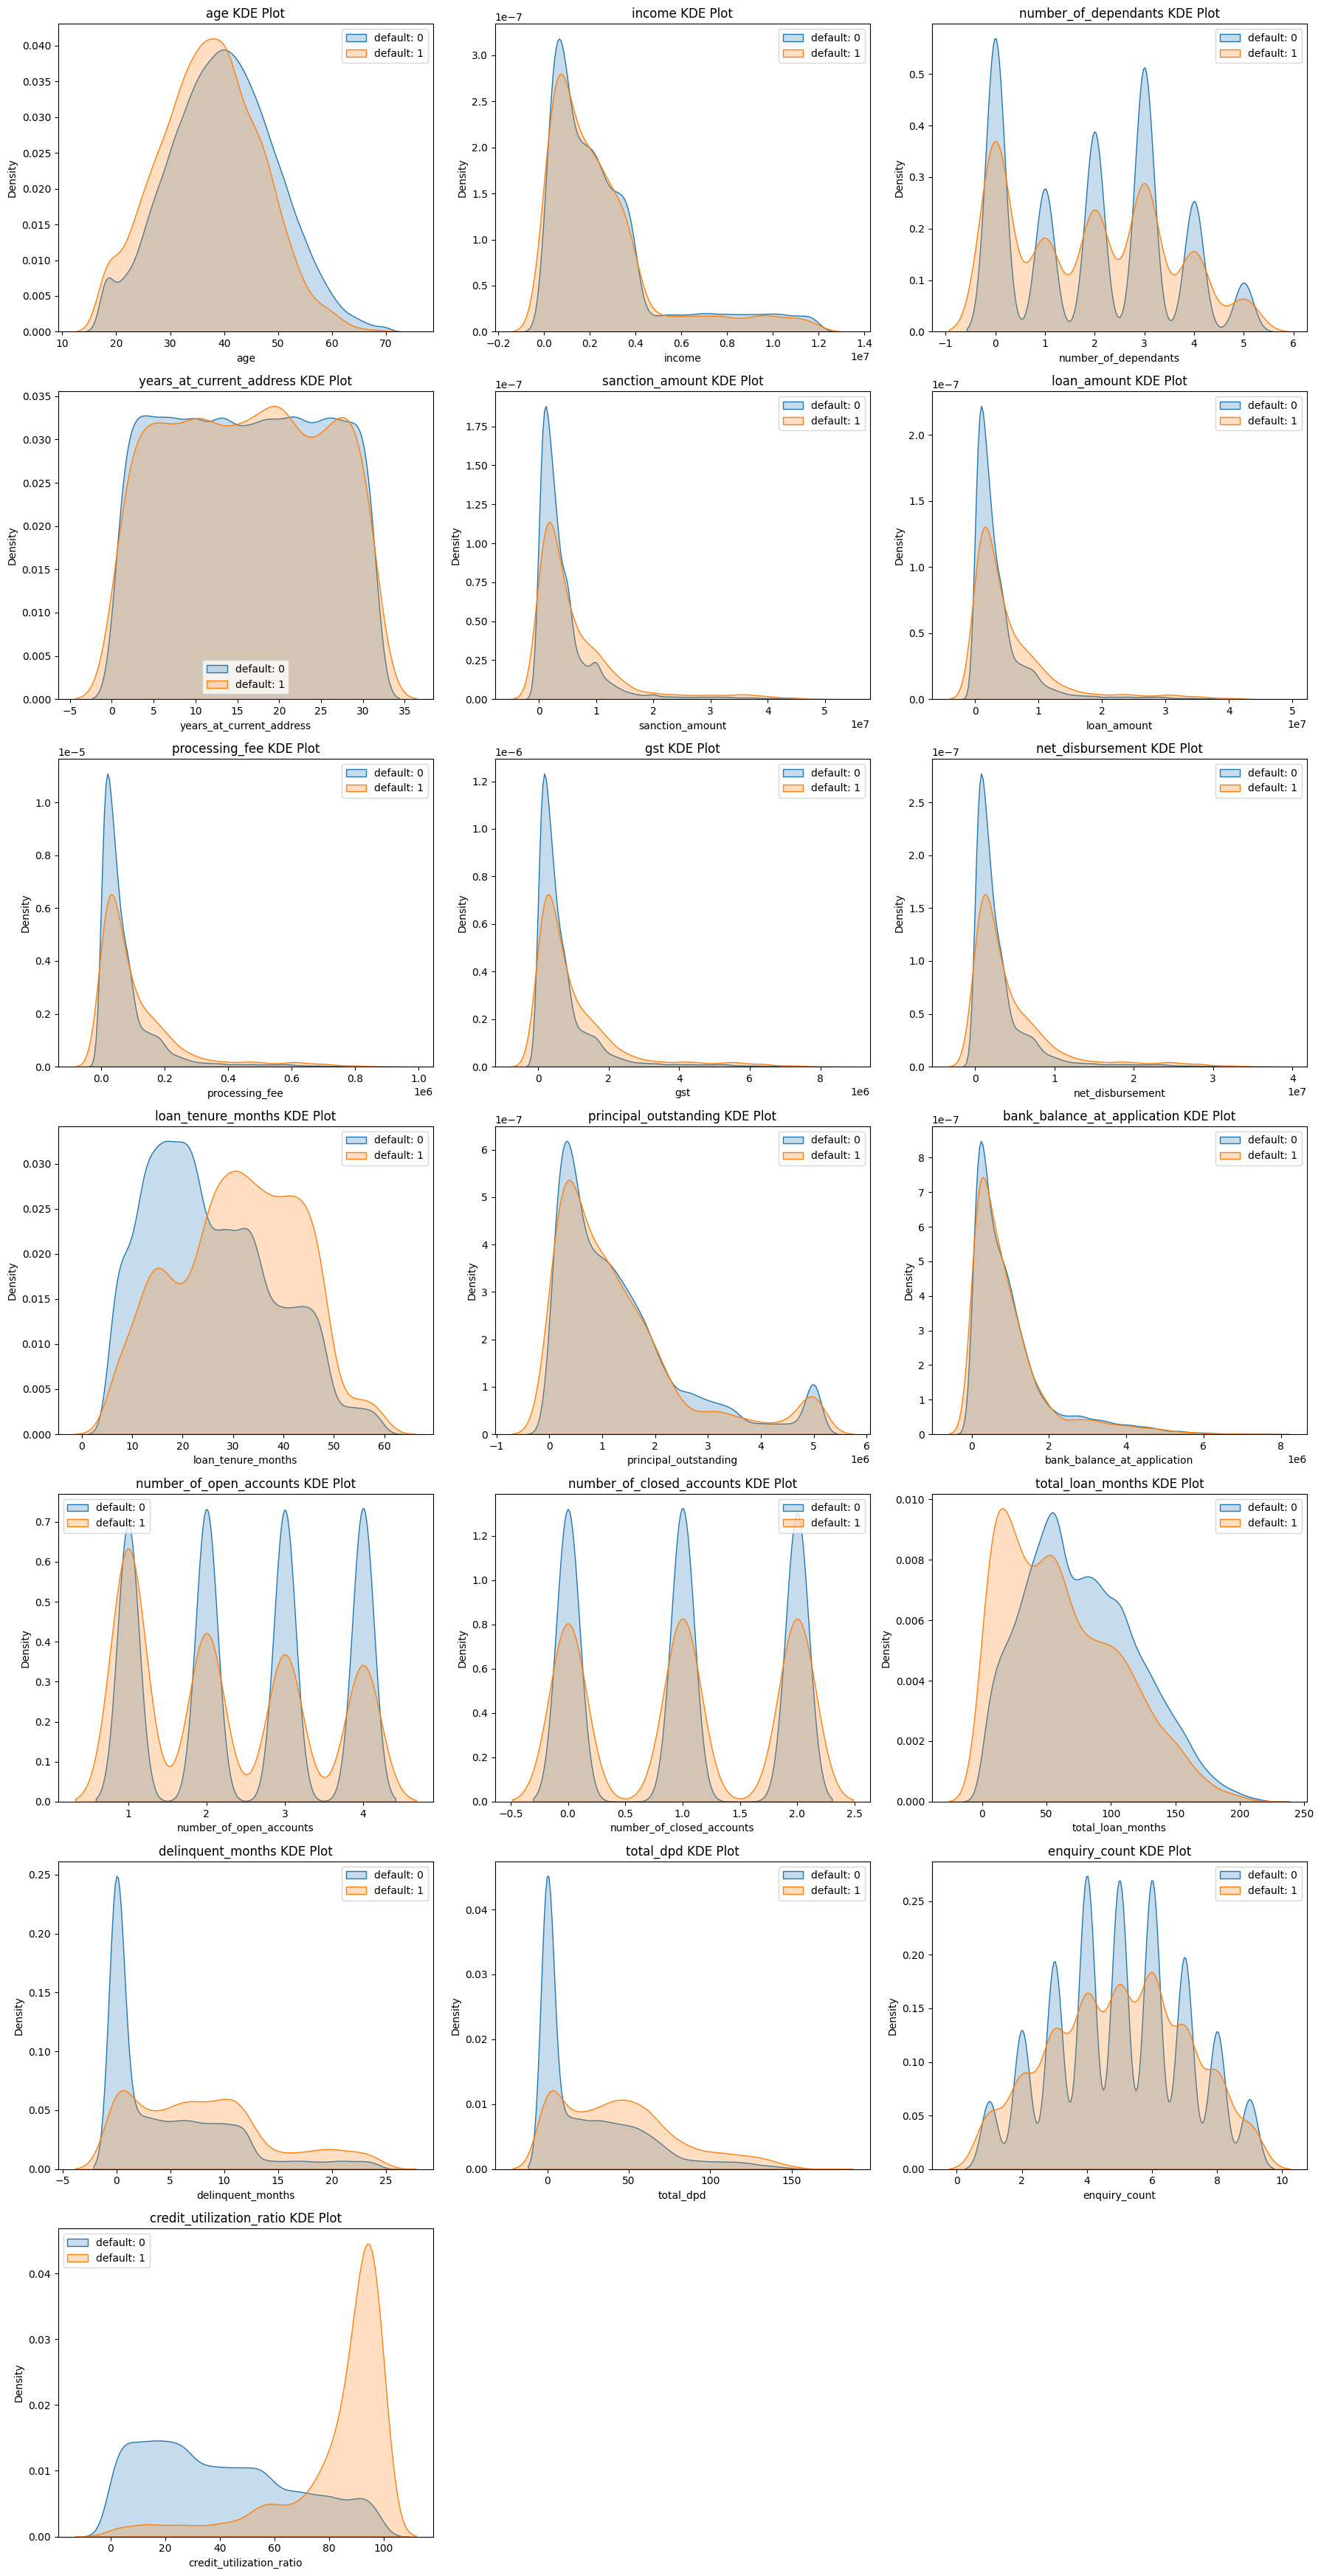

In [43]:
n_cols = 3
n_rows = math.ceil(len(columns_numerical) / n_cols)

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(columns_numerical, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(df_train_1[df_train_1['default'] == 0][col],
                fill=True, label='default: 0')
    sns.kdeplot(df_train_1[df_train_1['default'] == 1][col],
                fill=True, label='default: 1')
    plt.title(f'{col} KDE Plot', fontsize=12)
    plt.legend()
    plt.tight_layout()

plt.show()


Insights:
1. In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilisation_ratio, higher values indicates high likelihood of becoming default. So these 4 looks strong predictors
2. In remaining columns, the distributions does not give any obvious insights
3. Why loan_amount and income did not give any signs of strong predictors? Maybe when we combine these two and get loan to incoe ratio, it can have influence on target. 

<h3 align='center' style='color:blue'>Feature Engineering</h3>

In [44]:
df_train_1['loan_to_income']=df_train_1['loan_amount']/df_train_1['income']

In [45]:
df_train_1['loan_to_income'].describe()

count   37487.00
mean        1.55
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.45
max         4.57
Name: loan_to_income, dtype: float64

In [46]:
df_test_1['loan_to_income']=df_test_1['loan_amount']/df_test_1['income']
df_test_1['loan_to_income'].describe()

count   12498.00
mean        1.56
std         0.97
min         0.30
25%         0.77
50%         1.17
75%         2.45
max         4.59
Name: loan_to_income, dtype: float64

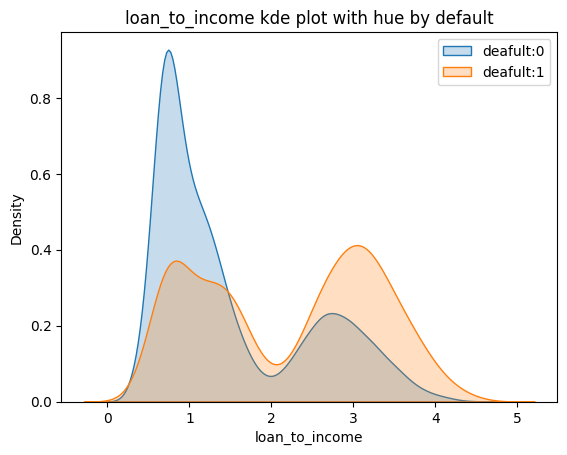

In [47]:
sns.kdeplot(df_train_1[df_train_1.default==0]['loan_to_income'],fill=True,label='deafult:0')
sns.kdeplot(df_train_1[df_train_1.default==1]['loan_to_income'],fill=True,label='deafult:1')
plt.title('loan_to_income kde plot with hue by default')
plt.legend()
plt.show()

In [48]:
df_train_1['delinquent_Ratio']= (df_train_1['delinquent_months']/df_train_1['total_loan_months'])*100
df_train_1['delinquent_Ratio'].describe()

count   37487.00
mean       10.39
std        17.27
min         0.00
25%         0.00
50%         3.80
75%        13.11
max       100.00
Name: delinquent_Ratio, dtype: float64

In [49]:
df_test_1['delinquent_Ratio']= (df_test_1['delinquent_months']/df_test_1['total_loan_months'])*100
df_test_1['delinquent_Ratio'].describe()

count   12498.00
mean       10.41
std        17.40
min         0.00
25%         0.00
50%         3.77
75%        12.90
max       100.00
Name: delinquent_Ratio, dtype: float64

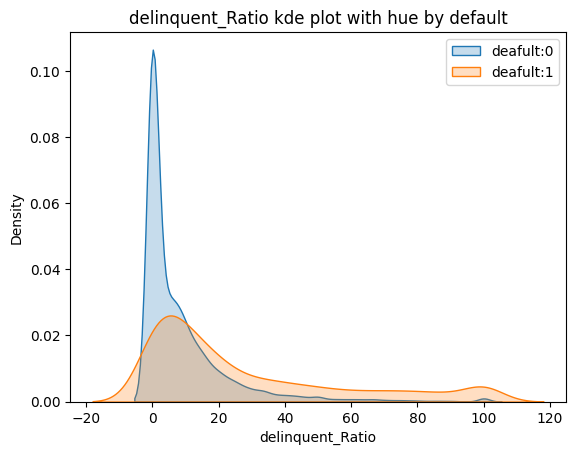

In [50]:
sns.kdeplot(df_train_1[df_train_1.default==0]['delinquent_Ratio'],fill=True,label='deafult:0')
sns.kdeplot(df_train_1[df_train_1.default==1]['delinquent_Ratio'],fill=True,label='deafult:1')
plt.title('delinquent_Ratio kde plot with hue by default')
plt.legend()
plt.show()

In [51]:
df_train_1['avg_dpd_per_delinquency']= np.where(
    df_train_1['delinquent_months']!=0,
    (df_train_1['total_dpd']/df_train_1['delinquent_months']),0)
df_train_1['avg_dpd_per_delinquency'].describe()

count   37487.00
mean        3.29
std         2.90
min         0.00
25%         0.00
50%         4.33
75%         5.75
max        10.00
Name: avg_dpd_per_delinquency, dtype: float64

In [52]:
df_train_1['avg_dpd_per_delinquency'].isnull().sum()

np.int64(0)

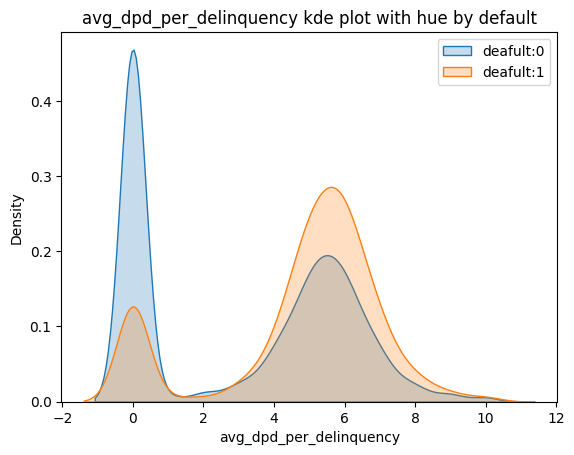

In [53]:
sns.kdeplot(df_train_1[df_train_1.default==0]['avg_dpd_per_delinquency'],fill=True,label='deafult:0')
sns.kdeplot(df_train_1[df_train_1.default==1]['avg_dpd_per_delinquency'],fill=True,label='deafult:1')
plt.title('avg_dpd_per_delinquency kde plot with hue by default')
plt.legend()
plt.show()

In [54]:
df_test_1['avg_dpd_per_delinquency']= np.where(
    df_test_1['delinquent_months']!=0,
    (df_test_1['total_dpd']/df_test_1['delinquent_months']),0)
df_test_1['avg_dpd_per_delinquency'].describe()

count   12498.00
mean        3.31
std         2.91
min         0.00
25%         0.00
50%         4.33
75%         5.75
max        10.00
Name: avg_dpd_per_delinquency, dtype: float64

### Feature Selection

In [55]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquent_Ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [56]:
df_train_2= df_train_1.drop(['cust_id','loan_id', 'sanction_amount','loan_amount','income','total_loan_months','delinquent_months',
       'total_dpd','disbursal_date', 'installment_start_dt'],axis='columns')
df_test_2= df_test_1.drop(['cust_id','loan_id', 'sanction_amount','loan_amount','income','total_loan_months','delinquent_months',
       'total_dpd','disbursal_date', 'installment_start_dt'],axis='columns')

In [57]:
df_train_2.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquent_Ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

##### variance inflation factor is caulcated to see the multicollinearity like loan amount is related to processing fee and gst or any other

In [58]:
df_train_2.select_dtypes(['int64','float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquent_Ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [59]:
X_train = df_train_2.drop('default', axis='columns')
y_train = df_train_2['default']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = X_train.select_dtypes(['int64', 'float64']).columns

scaler = MinMaxScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_Ratio,avg_dpd_per_delinquency
count,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00
mean,0.41,0.39,0.50,0.52,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.49,0.05,0.05,0.05,0.34,0.19,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.55,0.35,0.16,0.67,1.00,0.62,0.68,0.51,0.13,0.58
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [60]:
X_test = df_test_2.drop('default', axis='columns')
y_test = df_test_2['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_Ratio,avg_dpd_per_delinquency
count,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00
mean,0.41,0.39,0.50,0.53,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.51,0.50,0.44,0.30,0.10,0.33
std,0.19,0.31,0.30,0.29,0.11,0.11,0.11,0.24,0.25,0.13,0.37,0.41,0.26,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.51,0.05,0.05,0.05,0.36,0.20,0.08,0.67,0.50,0.50,0.39,0.21,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.75,0.68,0.51,0.13,0.57
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.88,1.00,1.00,1.00,1.00,1.01,1.00,1.00


In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [62]:
calculate_vif(X_train[cols_to_scale])

C:\Users\Priyanka Kansal\AppData\Roaming\Python\Python313\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.70
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.79
4,processing_fee,inf
5,gst,inf
6,net_disbursement,inf
7,loan_tenure_months,6.07
8,principal_outstanding,16.21
9,bank_balance_at_application,9.28


In [63]:
features_to_drop_vif=['processing_fee','gst','net_disbursement','principal_outstanding']

X_train_1=X_train.drop(features_to_drop_vif,axis='columns')


In [64]:
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns
vif_df=calculate_vif(X_train_1[numeric_columns])

In [65]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquent_Ratio', 'avg_dpd_per_delinquency'], dtype=object)

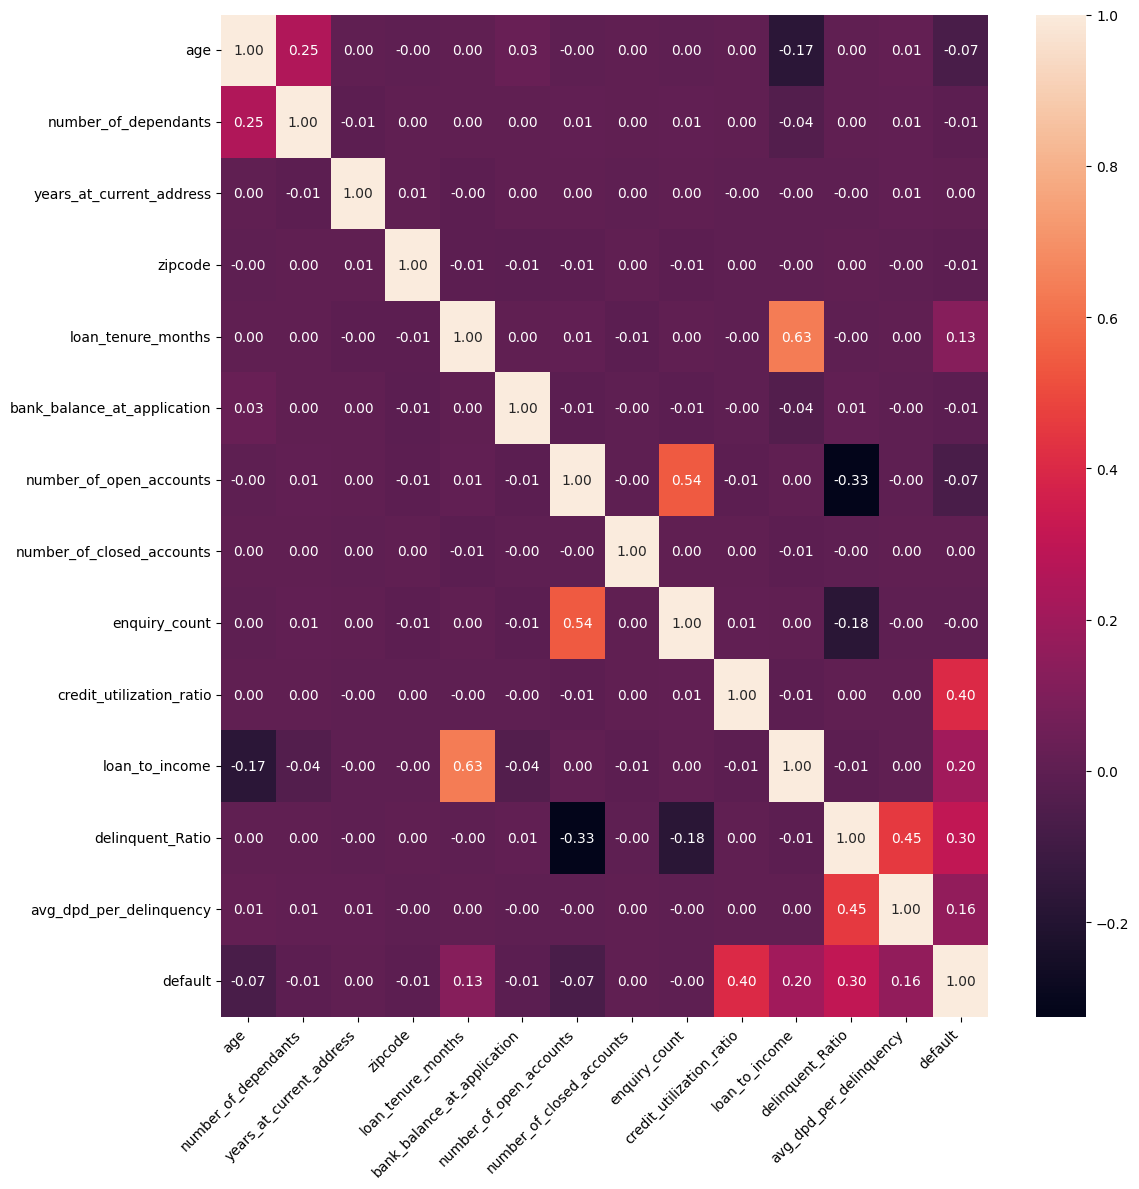

In [66]:
plt.figure(figsize=(12,12))
cm = df_train_2[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [67]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

### Calculate WOE and IV

In [68]:
def calculate_woe(df,feature,target):
    grouped=df.groupby(feature)[target].agg(['count','sum'])
    grouped=grouped.rename(columns={'count': 'total', 'sum':'good'})
    grouped['bad']=grouped['total']-grouped['good']
    
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct']=grouped['good']/total_good
    grouped['bad_pct']=grouped['bad']/total_bad
    
    grouped['woe']=np.log(grouped['good_pct']/grouped['bad_pct'])
    grouped['iv']=(grouped['good_pct']-grouped['bad_pct'])*grouped['woe']
    
    grouped['woe']=grouped['woe'].replace([np.inf,-np.inf],0)
    grouped['iv']=grouped['iv'].replace([np.inf,-np.inf],0)
    
    total_iv=grouped['iv'].sum()
    
    return grouped,total_iv
    

grouped,total_iv=calculate_woe(pd.concat([X_train_1,y_train],axis=1),'loan_purpose','default')
grouped


,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7437,314,7123,0.10,0.21,-0.75,0.08
Education,5626,546,5080,0.17,0.15,0.14,0.00
Home,11271,1744,9527,0.55,0.28,0.68,0.18
Personal,13153,585,12568,0.18,0.37,-0.69,0.13


In [69]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37487 entries, 27434 to 15795
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37487 non-null  float64
 1   gender                       37487 non-null  object 
 2   marital_status               37487 non-null  object 
 3   employment_status            37487 non-null  object 
 4   number_of_dependants         37487 non-null  float64
 5   residence_type               37487 non-null  object 
 6   years_at_current_address     37487 non-null  float64
 7   city                         37487 non-null  object 
 8   state                        37487 non-null  object 
 9   zipcode                      37487 non-null  float64
 10  loan_purpose                 37487 non-null  object 
 11  loan_type                    37487 non-null  object 
 12  loan_tenure_months           37487 non-null  float64
 13  bank_balance_at_a

In [70]:
pd.cut(X_train_1['loan_to_income'],bins=10)

27434       (0.6, 0.7]
13400       (0.1, 0.2]
883      (-0.001, 0.1]
7303        (0.1, 0.2]
45124       (0.3, 0.4]
             ...      
11284       (0.2, 0.3]
44732       (0.2, 0.3]
38158       (0.5, 0.6]
860         (0.2, 0.3]
15795       (0.1, 0.2]
Name: loan_to_income, Length: 37487, dtype: category
Categories (10, interval[float64, right]): [(-0.001, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]

In [71]:
iv_values={}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype=='object':
        _, iv=calculate_woe(pd.concat([X_train_1,y_train],axis=1),feature,'default')
    else:
        x_binned=pd.cut(X_train_1[feature],bins=10,labels=False)
        _, iv=calculate_woe(pd.concat([x_binned,y_train],axis=1),feature,'default')
    
    iv_values[feature]=iv

iv_values

{'age': np.float64(0.07592687127752061),
 'gender': np.float64(0.000482276463421216),
 'marital_status': np.float64(0.002196681370832318),
 'employment_status': np.float64(0.002447818101774487),
 'number_of_dependants': np.float64(0.00364589452118596),
 'residence_type': np.float64(0.2594019617563985),
 'years_at_current_address': np.float64(0.001042536380353028),
 'city': np.float64(0.000817870465334103),
 'state': np.float64(0.0007881984519711978),
 'zipcode': np.float64(0.0007436024782513755),
 'loan_purpose': np.float64(0.39377543144164784),
 'loan_type': np.float64(0.17304705897793143),
 'loan_tenure_months': np.float64(0.23450610202970526),
 'bank_balance_at_application': np.float64(0.004242001247914226),
 'number_of_open_accounts': np.float64(0.07324250836253295),
 'number_of_closed_accounts': np.float64(0.00026280824021760536),
 'enquiry_count': np.float64(0.005484982638303533),
 'credit_utilization_ratio': np.float64(2.4228228499400095),
 'loan_to_income': np.float64(0.4917403

In [72]:
pd.set_option('display.float_format',lambda x:'{:.3f}'.format(x))

iv_df=pd.DataFrame(list(iv_values.items()),columns=['Feature','IV'])
iv_df=iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.423
19,delinquent_Ratio,0.678
18,loan_to_income,0.492
20,avg_dpd_per_delinquency,0.421
10,loan_purpose,0.394
5,residence_type,0.259
12,loan_tenure_months,0.235
11,loan_type,0.173
0,age,0.076
14,number_of_open_accounts,0.073


In [73]:
selected_features_iv={ feature for feature,iv in iv_values.items() if iv>0.02}
selected_features_iv

{'age',
 'avg_dpd_per_delinquency',
 'credit_utilization_ratio',
 'delinquent_Ratio',
 'loan_purpose',
 'loan_tenure_months',
 'loan_to_income',
 'loan_type',
 'number_of_open_accounts',
 'residence_type'}

### Feature Encoding

In [74]:
X_train_reduced = X_train_1[list(selected_features_iv)]
X_test_reduced  = X_test[list(selected_features_iv)]

In [75]:
X_train_reduced.head()

,residence_type,loan_type,loan_tenure_months,loan_to_income,delinquent_Ratio,avg_dpd_per_delinquency,credit_utilization_ratio,loan_purpose,age,number_of_open_accounts
27434,Owned,Secured,0.340,0.609,0.067,0.550,0.596,Home,0.519,1.000
13400,Owned,Secured,0.509,0.185,0.034,0.425,0.929,Auto,0.212,0.667
883,Mortgage,Unsecured,0.245,0.086,0.169,0.557,0.838,Personal,0.615,0.333
7303,Owned,Secured,0.283,0.187,0.000,0.000,0.343,Auto,0.481,0.000
45124,Owned,Secured,0.736,0.363,0.097,0.467,0.192,Education,0.250,0.333


In [76]:
X_train_encoded=pd.get_dummies(X_train_reduced,drop_first=True)
X_test_encoded=pd.get_dummies(X_test_reduced,drop_first=True)

In [77]:
X_train_encoded.head(3)

,loan_tenure_months,loan_to_income,delinquent_Ratio,avg_dpd_per_delinquency,credit_utilization_ratio,age,number_of_open_accounts,residence_type_Owned,residence_type_Rented,loan_type_Unsecured,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal
27434,0.340,0.609,0.067,0.550,0.596,0.519,1.000,True,False,False,False,True,False
13400,0.509,0.185,0.034,0.425,0.929,0.212,0.667,True,False,False,False,False,False
883,0.245,0.086,0.169,0.557,0.838,0.615,0.333,False,False,True,False,False,True


<h3 align='center' style='color:blue'>Model Training</h3>

### Attempt 1 :
1. Logistic Regression,Random_Forest, XGBoost
2. No handling of unbalanced data

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr_model=LogisticRegression()
lr_model.fit(X_train_encoded,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [80]:
y_pred=lr_model.predict(X_test_encoded)

In [81]:
from sklearn.metrics import classification_report

cr=classification_report(y_test,y_pred)
print(cr)

#if a person is likely to default, we would like to catch it - recall

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [82]:
from sklearn.ensemble import RandomForestClassifier

rfc_model=RandomForestClassifier()
rfc_model.fit(X_train_encoded,y_train)

y_pred_rfc=rfc_model.predict(X_test_encoded)

cr_rfc=classification_report(y_test,y_pred_rfc)
print(cr_rfc)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.85      0.71      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.91      0.85      0.88     12498
weighted avg       0.96      0.96      0.96     12498



In [83]:
from xgboost import XGBClassifier

xgb_model=XGBClassifier()
xgb_model.fit(X_train_encoded,y_train)

y_pred_rfc=xgb_model.predict(X_test_encoded)

cr_xgb=classification_report(y_test,y_pred_rfc)
print(cr_xgb)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11390
           1       0.82      0.74      0.78      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.86      0.88     12498
weighted avg       0.96      0.96      0.96     12498



In [84]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Randomised Search CV for Attempt 1 :Logistic Regression

In [85]:
from sklearn.model_selection import RandomizedSearchCV

param_dist={
    'C': np.logspace(-4,4,20), # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs','saga','liblinear','newton-cg']
}

log_reg=LogisticRegression(max_iter=10000)

random_search= RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,   # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores

)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'lbfgs', 'C': np.float64(545.5594781168514)}
Best Score: 0.7629892080748256
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.83      0.71      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.85      0.87     12498
weighted avg       0.96      0.96      0.96     12498



#### Randomised Search CV for Attempt 1 : XGBoost

In [86]:
from scipy.stats import uniform,randint
from sklearn.model_selection import RandomizedSearchCV

param_dist={
    'n_estimators':[100,150,200,250,300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7927335587125056
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11390
           1       0.78      0.82      0.80      1108

    accuracy                           0.96     12498
   macro avg       0.88      0.90      0.89     12498
weighted avg       0.96      0.96      0.96     12498



#### Attempt 2:
1. Logistic Regression & XGB
2. Handling class imbalance using UnderSampling

In [89]:
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train_encoded,y_train)

y_train_rus.value_counts()

default
0    3189
1    3189
Name: count, dtype: int64

In [90]:
model=LogisticRegression()
model.fit(X_train_rus,y_train_rus)

y_pred=model.predict(X_test_encoded)
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     10515
           1       0.95      0.53      0.68      1983

    accuracy                           0.92     12498
   macro avg       0.93      0.76      0.82     12498
weighted avg       0.92      0.92      0.91     12498



In [91]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [92]:
!{sys.executable} -m pip install xgboost imblearn

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


In [93]:
model=XGBClassifier(**random_search.best_params_)

model.fit(X_train_rus,y_train_rus)

y_pred=model.predict(X_test_encoded)
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10403
           1       0.98      0.52      0.68      2095

    accuracy                           0.92     12498
   macro avg       0.95      0.76      0.82     12498
weighted avg       0.92      0.92      0.91     12498



### Attempt 3:
1. Logistic Regression
2. Handle Class Imbalance using SMOTE Technique
3. Paramter tuning using Optuna

In [94]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34226
1    34226
Name: count, dtype: int64

In [95]:
model=LogisticRegression()
model.fit(X_train_smt,y_train_smt)

y_pred=model.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [96]:
!pip install optuna
import optuna

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached colorlog-6.10.1-py3-none-any.whl.metadata (11 kB)
  Using cached mako-1.3.10-py3-none-any.whl.metadata (2.9 kB)
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.1 MB 5.7 MB/s eta 0:00:01
   ----------------------------- ---------- 1.6/2.1 MB 3.3 MB/s eta 0:00:01
   ----------------------------- ---------- 1.6/2.1 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 2.5 MB/s  0:00:00
Using cached colorlog-6.10.1-py3-none-any.whl (11 kB)
Using cached mako-1.3.10-py3-none-any.whl (78 kB)

   ---------------------------------------- 0/7 [tqdm]
   ---------------------------------------- 0/7 [tqdm]
   ---------------------------------------- 0/7 [tqdm]
   ---------------------------------------- 0/7 [tqdm]
   ---------------------------------------- 0/7 [tqdm]
   ---------------------------------------- 0

C:\Users\Priyanka Kansal\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

In [98]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-11-21 14:31:54,166] A new study created in memory with name: no-name-b59f1772-1270-46b4-810c-5a5e4b2b0f4b
[I 2025-11-21 14:31:54,795] Trial 0 finished with value: 0.9414742661986445 and parameters: {'C': 0.18171599556655652, 'solver': 'newton-cg', 'tol': 0.0005697699426067103, 'class_weight': None}. Best is trial 0 with value: 0.9414742661986445.
[I 2025-11-21 14:31:55,454] Trial 1 finished with value: 0.9433249360723107 and parameters: {'C': 0.3195374619419971, 'solver': 'saga', 'tol': 0.0021811382179322395, 'class_weight': None}. Best is trial 1 with value: 0.9433249360723107.
[I 2025-11-21 14:31:55,809] Trial 2 finished with value: 0.8578712404221808 and parameters: {'C': 144.38209977007975, 'solver': 'newton-cg', 'tol': 0.04896750116300769, 'class_weight': None}. Best is trial 1 with value: 0.9433249360723107.
[I 2025-11-21 14:31:56,430] Trial 3 finished with value: 0.9442943964850125 and parameters: {'C': 1.0127853118198615, 'solver': 'newton-cg', 'tol': 2.489659072289193e

In [99]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9449498349127438
  Params: 
    C: 318.4135010532601
    solver: saga
    tol: 0.05184857398270289
    class_weight: balanced
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     11390
           1       0.59      0.92      0.72      1108

    accuracy                           0.94     12498
   macro avg       0.79      0.93      0.84     12498
weighted avg       0.96      0.94      0.94     12498



### Attempt 4:
1. XGBoost
2. Handle Class Imbalance using SMOTEK 
3. Paramter tuning using Optuna

In [100]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-11-21 14:32:21,542] A new study created in memory with name: no-name-c2654323-990e-4322-836e-27240b49dc0b
[I 2025-11-21 14:32:23,110] Trial 0 finished with value: 0.9668712889290211 and parameters: {'lambda': 0.6358950970276217, 'alpha': 0.007889290730863368, 'subsample': 0.9474897615156282, 'colsample_bytree': 0.9217440196704433, 'max_depth': 6, 'eta': 0.2508586661185131, 'gamma': 9.07035414988154, 'scale_pos_weight': 1.0344783296607223, 'min_child_weight': 6, 'max_delta_step': 9}. Best is trial 0 with value: 0.9668712889290211.
[I 2025-11-21 14:32:25,864] Trial 1 finished with value: 0.9678934984807511 and parameters: {'lambda': 0.011502013473249166, 'alpha': 0.9852355021632734, 'subsample': 0.41438810022116873, 'colsample_bytree': 0.7606855854485977, 'max_depth': 9, 'eta': 0.13222641838305318, 'gamma': 3.791544158544433, 'scale_pos_weight': 3.8344881543437555, 'min_child_weight': 8, 'max_delta_step': 4}. Best is trial 1 with value: 0.9678934984807511.
[I 2025-11-21 14:32:28,

In [101]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9757281587959303
  Params: 
    lambda: 0.00442338974449305
    alpha: 0.0038457160274845835
    subsample: 0.7373290999849446
    colsample_bytree: 0.6283591610490895
    max_depth: 10
    eta: 0.22888018107498165
    gamma: 1.3218999837096295
    scale_pos_weight: 2.39421815854133
    min_child_weight: 4
    max_delta_step: 7
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11390
           1       0.71      0.85      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.85      0.91      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [102]:
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     11390
           1       0.59      0.92      0.72      1108

    accuracy                           0.94     12498
   macro avg       0.79      0.93      0.84     12498
weighted avg       0.96      0.94      0.94     12498



### Model Evaluation : ROC/AUC

In [103]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

fpr[:5], tpr[:5], thresholds[:5]

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.77963126e-05,
        8.77963126e-05]),
 array([0.        , 0.00090253, 0.20487365, 0.20487365, 0.20848375]),
 array([       inf, 0.99999997, 0.99879274, 0.9987914 , 0.99875412]))

In [104]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

0.9827477076287706

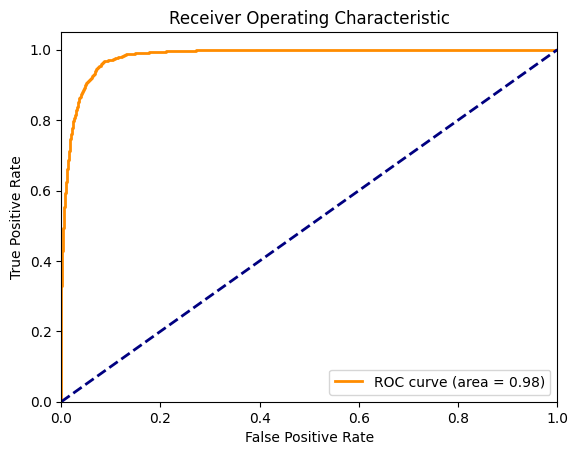

In [105]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Model Evaluation : Rankordering, KS statistics, Gini Coefficient

In [106]:
probabilities=best_model_logistic.predict_proba(X_test_encoded)[:,1]


df_eval= pd.DataFrame({
    'Default_Truth':y_test,
    'Default_Probability': probabilities
})

df_eval


,Default_Truth,Default_Probability
33553,0,0.000
9427,0,0.762
199,0,0.116
12447,0,0.315
39489,0,0.001
...,...,...
9771,0,0.000
34737,0,0.000
30390,0,0.000
6797,0,0.000


In [107]:


df_eval['Decile']=pd.qcut(df_eval['Default_Probability'],
                          10,labels=False,duplicates='drop')

df_eval.head(3)

,Default_Truth,Default_Probability,Decile
33553,0,0.000,1
9427,0,0.762,8
199,0,0.116,7


In [108]:
df_grouped=df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum_Probability' : x['Default_Probability'].min(),
    'Maximum_Probability' : x['Default_Probability'].max(),
    'Events': x['Default_Truth'].sum(),
    'Non-events' : x['Default_Truth'].count()-x['Default_Truth'].sum()
}))

df_grouped.reset_index(inplace=True)
df_grouped

C:\Users\Priyanka Kansal\AppData\Local\Temp\ipykernel_25080\2036722747.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped=df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum_Probability,Maximum_Probability,Events,Non-events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1250.000
3,3,0.000,0.000,0.000,1249.000
4,4,0.000,0.001,0.000,1250.000
5,5,0.001,0.003,1.000,1249.000
6,6,0.003,0.023,2.000,1247.000
7,7,0.023,0.162,17.000,1233.000
8,8,0.163,0.780,179.000,1071.000
9,9,0.780,1.000,909.000,341.000


In [109]:
df_grouped['Event_Rate']=df_grouped['Events']*100 / (df_grouped['Events']+df_grouped['Non-events'])

df_grouped['Non-Event_Rate']=df_grouped['Non-events']*100 / (df_grouped['Events']+df_grouped['Non-events'])

df_grouped

,Decile,Minimum_Probability,Maximum_Probability,Events,Non-events,Event_Rate,Non-Event_Rate
0,0,0.000,0.000,0.000,1250.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
2,2,0.000,0.000,0.000,1250.000,0.000,100.000
3,3,0.000,0.000,0.000,1249.000,0.000,100.000
4,4,0.000,0.001,0.000,1250.000,0.000,100.000
5,5,0.001,0.003,1.000,1249.000,0.080,99.920
6,6,0.003,0.023,2.000,1247.000,0.160,99.840
7,7,0.023,0.162,17.000,1233.000,1.360,98.640
8,8,0.163,0.780,179.000,1071.000,14.320,85.680
9,9,0.780,1.000,909.000,341.000,72.720,27.280


In [110]:
df_grouped=df_grouped.sort_values(by='Decile',ascending=False).reset_index(drop=True)
df_grouped

,Decile,Minimum_Probability,Maximum_Probability,Events,Non-events,Event_Rate,Non-Event_Rate
0,9,0.780,1.000,909.000,341.000,72.720,27.280
1,8,0.163,0.780,179.000,1071.000,14.320,85.680
2,7,0.023,0.162,17.000,1233.000,1.360,98.640
3,6,0.003,0.023,2.000,1247.000,0.160,99.840
4,5,0.001,0.003,1.000,1249.000,0.080,99.920
5,4,0.000,0.001,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1249.000,0.000,100.000
7,2,0.000,0.000,0.000,1250.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [111]:
df_grouped['Cum_Events']=df_grouped['Events'].cumsum()
df_grouped['Cum Non_Events']=df_grouped['Non-events'].cumsum()
df_grouped

,Decile,Minimum_Probability,Maximum_Probability,Events,Non-events,Event_Rate,Non-Event_Rate,Cum_Events,Cum Non_Events
0,9,0.780,1.000,909.000,341.000,72.720,27.280,909.000,341.000
1,8,0.163,0.780,179.000,1071.000,14.320,85.680,1088.000,1412.000
2,7,0.023,0.162,17.000,1233.000,1.360,98.640,1105.000,2645.000
3,6,0.003,0.023,2.000,1247.000,0.160,99.840,1107.000,3892.000
4,5,0.001,0.003,1.000,1249.000,0.080,99.920,1108.000,5141.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1108.000,6391.000
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000
7,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000


In [112]:
df_grouped['Cum_Event_Rate']=df_grouped['Cum_Events']*100 / df_grouped['Events'].sum()
df_grouped['Cum_Non-Event_Rate']=df_grouped['Cum Non_Events']*100 / df_grouped['Non-events'].sum()
df_grouped

,Decile,Minimum_Probability,Maximum_Probability,Events,Non-events,Event_Rate,Non-Event_Rate,Cum_Events,Cum Non_Events,Cum_Event_Rate,Cum_Non-Event_Rate
0,9,0.780,1.000,909.000,341.000,72.720,27.280,909.000,341.000,82.040,2.994
1,8,0.163,0.780,179.000,1071.000,14.320,85.680,1088.000,1412.000,98.195,12.397
2,7,0.023,0.162,17.000,1233.000,1.360,98.640,1105.000,2645.000,99.729,23.222
3,6,0.003,0.023,2.000,1247.000,0.160,99.840,1107.000,3892.000,99.910,34.170
4,5,0.001,0.003,1.000,1249.000,0.080,99.920,1108.000,5141.000,100.000,45.136
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1108.000,6391.000,100.000,56.111
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000,100.000,67.076
7,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000,100.000,78.051
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000,100.000,89.025
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000,100.000,100.000


In [113]:
df_grouped['KS']=abs(df_grouped['Cum_Event_Rate']-df_grouped['Cum_Non-Event_Rate'])
df_grouped

,Decile,Minimum_Probability,Maximum_Probability,Events,Non-events,Event_Rate,Non-Event_Rate,Cum_Events,Cum Non_Events,Cum_Event_Rate,Cum_Non-Event_Rate,KS
0,9,0.780,1.000,909.000,341.000,72.720,27.280,909.000,341.000,82.040,2.994,79.046
1,8,0.163,0.780,179.000,1071.000,14.320,85.680,1088.000,1412.000,98.195,12.397,85.798
2,7,0.023,0.162,17.000,1233.000,1.360,98.640,1105.000,2645.000,99.729,23.222,76.507
3,6,0.003,0.023,2.000,1247.000,0.160,99.840,1107.000,3892.000,99.910,34.170,65.739
4,5,0.001,0.003,1.000,1249.000,0.080,99.920,1108.000,5141.000,100.000,45.136,54.864
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1108.000,6391.000,100.000,56.111,43.889
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000,100.000,67.076,32.924
7,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000,100.000,78.051,21.949
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000,100.000,89.025,10.975
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000,100.000,100.000,0.000


To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

Events and Non-Events terms are interchanged based on usecase to usecase.

eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be non-events (bad).

Insights from the Decile Table

Top Deciles
The first decile (Decile 9) has a high event rate of 73.28% and a non-event rate of 26.72%. This indicates that the model is highly confident in predicting events in this decile.
The second decile (Decile 8) also shows a significant event rate of 13.680%, with a cumulative event rate reaching 98.105%.
Middle Deciles:
Deciles 7 and 6 show a significant drop in event rates
Lower Deciles:
Deciles 5 to 0 show zero events, with all predictions being non-events. These deciles collectively have a non-event rate of 100%.
KS Statistic:
The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 85.699%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.

The KS value gradually decreases in the following deciles, indicating a decrease in model performance for distinguishing between events and non-events.

KS Value

The highest KS value is 85.699%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)

In [114]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9827477076287706
Gini Coefficient: 0.9654954152575412


AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

### Finalize The Model and Visualize Feature Importanc

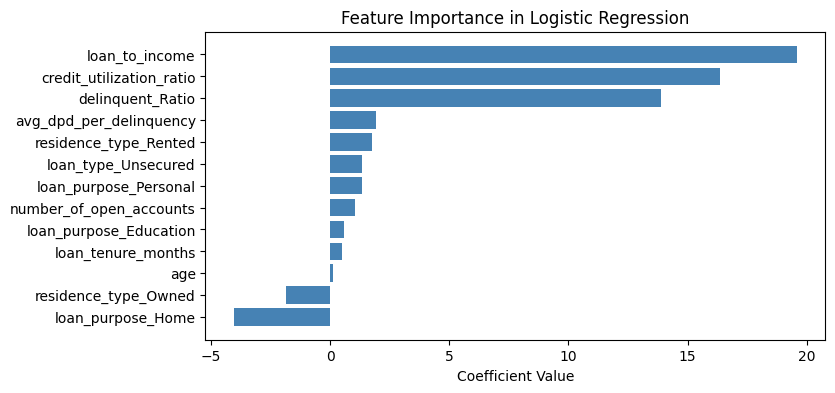

In [115]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Save the model

In [116]:
X_test_encoded.head(2)

,loan_tenure_months,loan_to_income,delinquent_Ratio,avg_dpd_per_delinquency,credit_utilization_ratio,age,number_of_open_accounts,residence_type_Owned,residence_type_Rented,loan_type_Unsecured,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal
33553,0.528,0.258,0.043,0.900,0.121,0.346,0.333,True,False,False,True,False,False
9427,0.623,0.690,0.000,0.000,0.859,0.288,1.000,True,False,False,False,True,False


In [117]:
X_test_encoded.columns

Index(['loan_tenure_months', 'loan_to_income', 'delinquent_Ratio',
       'avg_dpd_per_delinquency', 'credit_utilization_ratio', 'age',
       'number_of_open_accounts', 'residence_type_Owned',
       'residence_type_Rented', 'loan_type_Unsecured',
       'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Personal'],
      dtype='object')

In [118]:
X_train_encoded.columns

Index(['loan_tenure_months', 'loan_to_income', 'delinquent_Ratio',
       'avg_dpd_per_delinquency', 'credit_utilization_ratio', 'age',
       'number_of_open_accounts', 'residence_type_Owned',
       'residence_type_Rented', 'loan_type_Unsecured',
       'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Personal'],
      dtype='object')

In [119]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_Ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [121]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'artifacts/model_data.joblib')

['artifacts/model_data.joblib']

In [122]:
final_model.coef_, final_model.intercept_

(array([[ 0.5055419 , 19.60798378, 13.87967502,  1.90724299, 16.34255228,
          0.10232767,  1.05115059, -1.85872115,  1.7396606 ,  1.32996922,
          0.5823557 , -4.05274555,  1.32996922]]),
 array([-21.87435889]))

In [123]:
model_data['features']
model_data['cols_to_scale']

scaler.feature_names_in_

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_Ratio',
       'avg_dpd_per_delinquency'], dtype=object)

In [124]:
model_data['cols_to_scale']

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_Ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [125]:
model_data['features']

Index(['loan_tenure_months', 'loan_to_income', 'delinquent_Ratio',
       'avg_dpd_per_delinquency', 'credit_utilization_ratio', 'age',
       'number_of_open_accounts', 'residence_type_Owned',
       'residence_type_Rented', 'loan_type_Unsecured',
       'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Personal'],
      dtype='object')